## Part (a)

test label [0]
8-Nearest neighbor idx [952 690 320 210 192 836  81 542]
8-Nearest neighbor label [0 5 0 0 0 5 0 0]
test label [7]
8-Nearest neighbor idx [723 753  71  15 911 981 193  79]
8-Nearest neighbor label [7 7 7 7 7 7 7 7]
test label [1]
8-Nearest neighbor idx [484 398 454 638   8 678 112 310]
8-Nearest neighbor label [1 1 1 1 1 1 1 1]
test label [1]
8-Nearest neighbor idx [587 951 593 961 475 637 993 919]
8-Nearest neighbor label [1 1 1 1 1 1 1 1]
test label [4]
8-Nearest neighbor idx [576 604 304  26 718 900 412 354]
8-Nearest neighbor label [4 1 9 4 4 9 4 4]


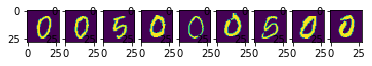

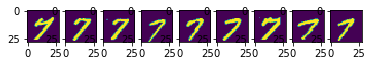

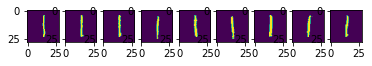

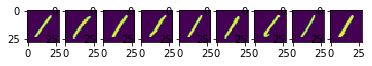

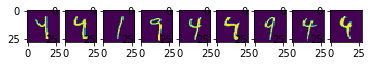

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# part (a) kNN algorithm
def compute_L2_d(x_test, X, k):
    N = X.shape[0]
    diff = np.tile(x_test, (N, 1, 1)) - X
    diff = diff.reshape(N,-1)
    d_square = np.sum(diff**2, axis=1)
    closest_idx = np.argsort(d_square)
    
    return closest_idx[:k]

# Load the data
q1_digits = np.load('q1_data/q1_digits.npz')
digits_train = q1_digits['digits_train']
labels_train = q1_digits['labels_train']
digits_test = q1_digits['digits_test']
labels_test = q1_digits['labels_test']

# For the first 5 examples, find 8-Nearest neighbors
k = 8
for i in range(5):
    closest_idx = compute_L2_d(digits_test[i,:,:], digits_train, k)
    print('test label', labels_test[i])
    print('8-Nearest neighbor idx', closest_idx)
    print('8-Nearest neighbor label', labels_train[closest_idx].reshape(len(closest_idx)))
    fig, ax = plt.subplots(nrows=1, ncols=9)
    ax[0].imshow(digits_test[i,:,:])
    for j in range(k):
        ax[j+1].imshow(digits_train[closest_idx[j],:,:])

[Image] 1st column: test sample, 2-9th columns: nearest neighbors

(a) [11 points]

## Part (b)

(b) Answer[8 points]:  Accuracy is 85.70%

In [2]:
# part (b) 
k = 10
count_correct = 0
for i in range(digits_test.shape[0]):
    closest_idx = compute_L2_d(digits_test[i,:,:], digits_train, k)
    predicted_label = np.bincount(labels_train[closest_idx].reshape(len(closest_idx))).argmax()
    if labels_test[i] == predicted_label:
        count_correct += 1
print('accuracy :', 100*count_correct/digits_test.shape[0])

accuracy : 85.7


## Part (c)

 (c) Answer[3 points]:  
 
    ### Advantages: 
       - It is simple to implement and debug.
       - Theoretical guarantee: When K=1 and N goes to inﬁnity, the asymptotic error is at most twice of
         Bayes optimal error (the minimum achievable error rate of an optimal classiﬁer).
       - kNN can be useful in explaining the output of classiﬁer through the analysis of the neighbors.
       
    ### Disadvantages:
       - For every test example, the naive implementation computes the distance between the test example
         and all entries in the training set. So, the complexity is O(N) where N is the size of the training
         set. This can be very slow when N is large.
       - Need a big memory to hold an access all examples.
       - kNN is sensitive to distance metric. Depending on how you deﬁne the distance metric, you will get
         quite a diﬀerent result. One related research topic is distance metric learning, which tries to learn
         a better distance metric for classiﬁcation.
       - kNN is not robust to irrelevant features. For example, if a certain input feature (coordinate) is
         distributed from the white noise, then it can still adversely aﬀect the performance of kNN classiﬁer.
         In such cases, some techniques like feature selection can be helpful.
       - On more diﬃcult classiﬁcation problems, kNN is often outperformed by other discriminative clas-
         siﬁers, like SVM.

    ### classfication accuracy with respect to k:
       - larger k -> the bias increases (variance decreases) as large K means simple model
       - larger k means more smoothing, it will eventually result in under-fit.        
       - The accuracy decreases as it is shown in this problem.
       - In this problem, the accuracy decreases as k increases but in general, the k that results in 
       the highest accuracy depends on the problem.


## Part (d)

(d) Answer[4 points]:   It is possible to improve kNN accuracy in multiple ways.

    The followings are possible (not limited to):
    - Applying gaussian smoothing to the data. (i.e.: convolve the training images and a test image with
         a gaussian mask). 
    - Try diﬀerent k. Perhaps try diﬀerent k simultaneously and average their answer.
    - Do weighted majority vote (rather than majority vote). Where weight is a function of distance 
    (i.e.: the 1st nearest neighbor gives more weight to the ﬁnal answer than the 2nd nearest neighbor and so on).